In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
df_orig = pd.read_csv('Train.csv')
df_orig.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
for col in df.columns:
    print('num unique in {}: {}'.format(col, len(set(df[col]))))

num unique in Item_Identifier: 1559
num unique in Item_Weight: 1878
num unique in Item_Fat_Content: 5
num unique in Item_Visibility: 7880
num unique in Item_Type: 16
num unique in Item_MRP: 5938
num unique in Outlet_Identifier: 10
num unique in Outlet_Establishment_Year: 9
num unique in Outlet_Size: 4
num unique in Outlet_Location_Type: 3
num unique in Outlet_Type: 4
num unique in Item_Outlet_Sales: 3493


Almost all variables are quantized non have same number of distinct values as row

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


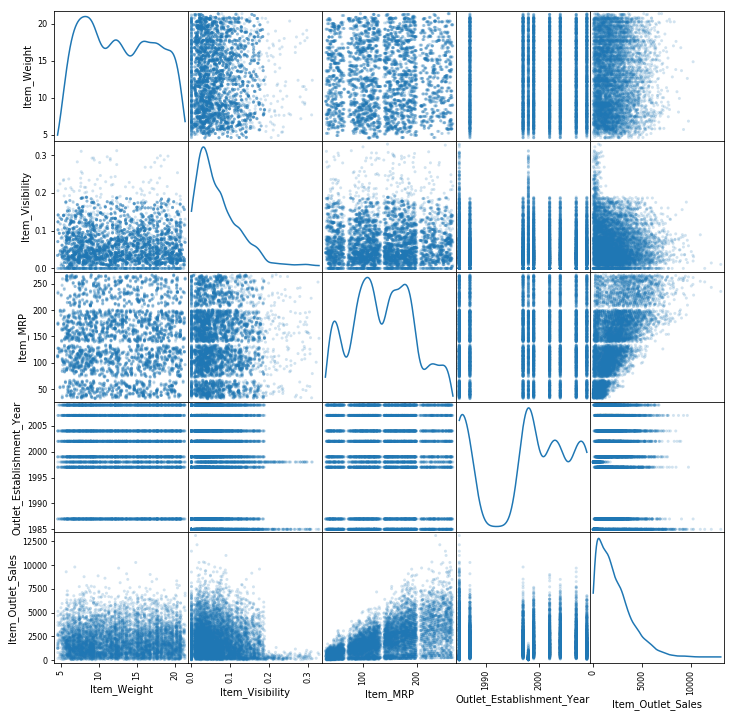

In [14]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde');

Item_weight does not seem to have much predictive power
Item_Visibility has a cutoff, logistic regression and tree based method may work well on this 

Item_MRP has a linear relationship with sales


In [32]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ident_mapped
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,7543
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5218
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8349
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,7735
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3428
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,5685
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8197
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,7883
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,7819
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,8419


# Item_Identifier

In [36]:
map_ident = { cat:i for i, cat in enumerate(df['Item_Identifier'])}
df['ident_mapped']  = df['Item_Identifier'].map(map_ident)


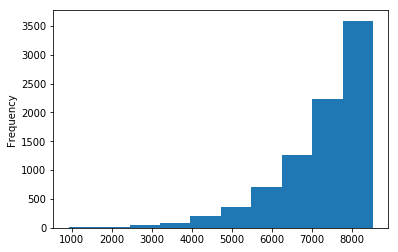

In [37]:
df['ident_mapped'].plot(kind='hist')

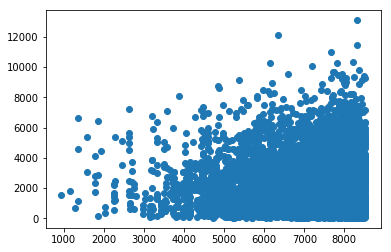

In [38]:
plt.scatter('ident_mapped', 'Item_Outlet_Sales', data=df)

Item_Identifier seems to be linearly relatedto the Item_Outlet_Sales based on our mapping above. Probably the data set is sorted based on item sales. 

# Item_Fat_Content

In [40]:
set(df['Item_Fat_Content'])

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

It seems items are either low fat or regular

In [41]:
len(df[df['Item_Fat_Content'].isnull()])

0

In [44]:
map_fatContent = {'LF':0, 'Low Fat':0, 'reg':1, 'Regular':1}

In [46]:
df['fatContent_mapped'] = df['Item_Fat_Content'].map(map_fatContent)

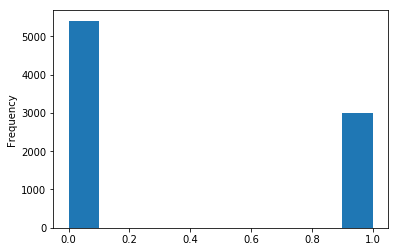

In [47]:
df['fatContent_mapped'].plot(kind='hist')

<IPython.core.display.Javascript object>


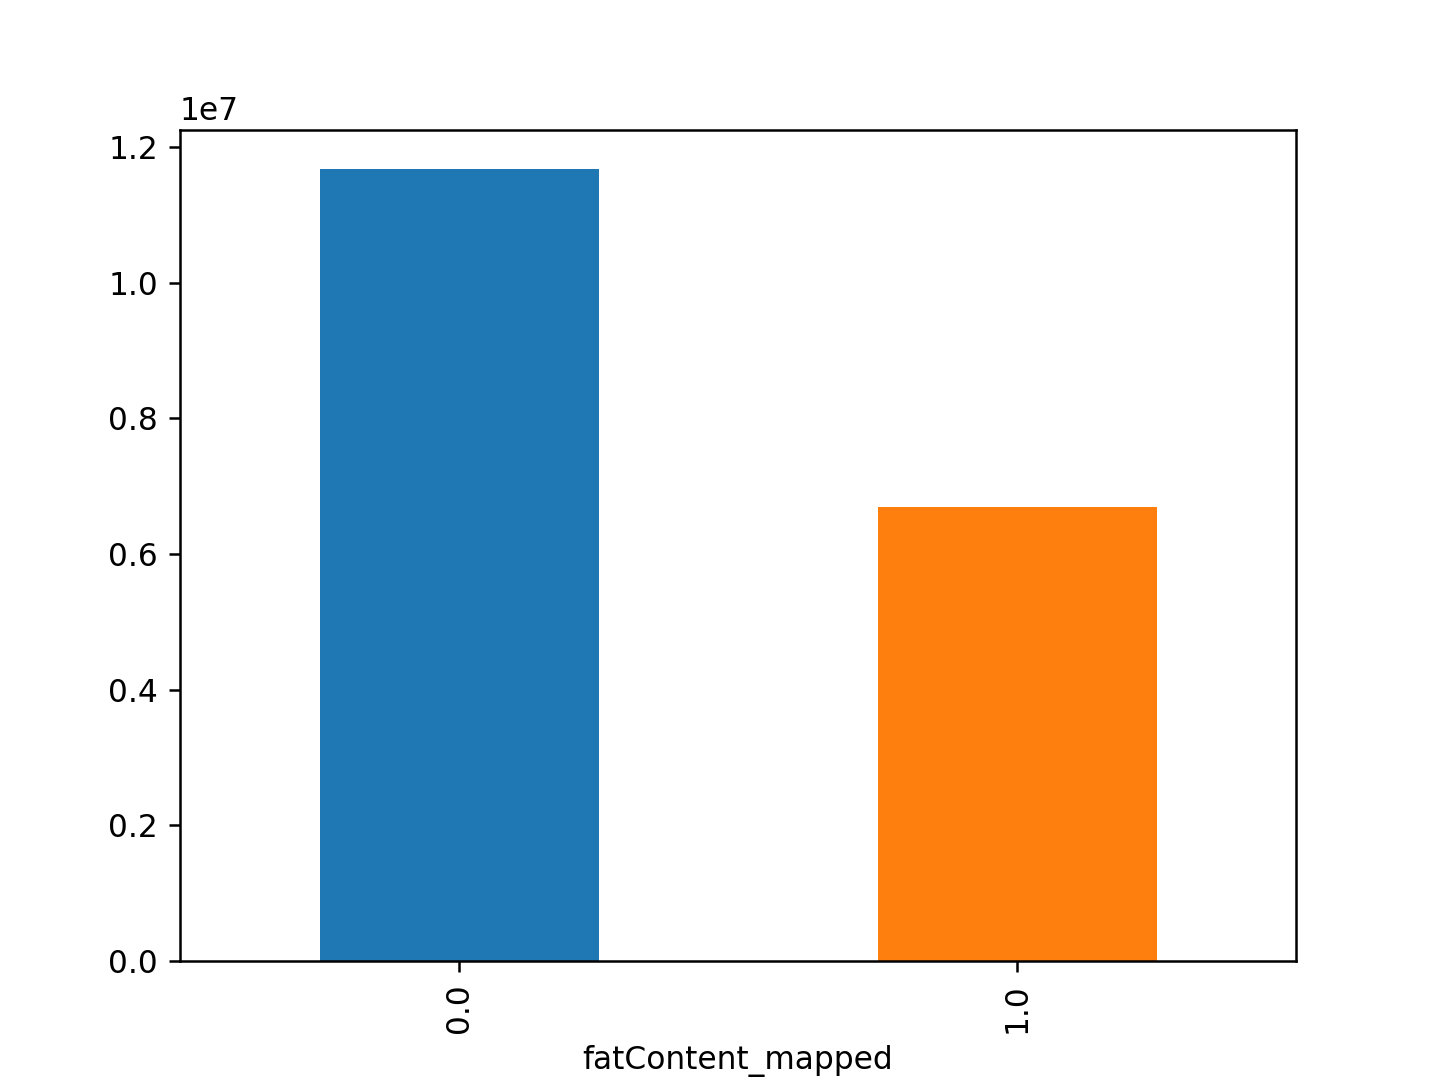

In [54]:
df.groupby('fatContent_mapped')['Item_Outlet_Sales'].sum().plot(kind='bar')

Low fat items have more sales than regular items. However, total number of low fat items is almost twice regular items. Sales seems to be almost the same proportion. Hence, there might not be much difference in the preference of low fat over regular.